# Data

In [49]:
import pandas as pd #imports pandas library
from sklearn.datasets import fetch_california_housing # imports dataset
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn import tree
import ipywidgets as widgets

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['target'] = housing.target # gives target attribute (median hoousing cost by $100,000) a column in data
print(df.head(20)) # will print first 20 rows


    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0   8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1   8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2   7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3   5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4   3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5   4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6   3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7   3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8   2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9   3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   
10  3.2031      52.0  5.477612   1.079602       910.0  2.263682     37.85   
11  3.2705      52.0  4.772480   1.024523      1504.0  2.049046     37.85   

# Descriptive Messages and Visualizations

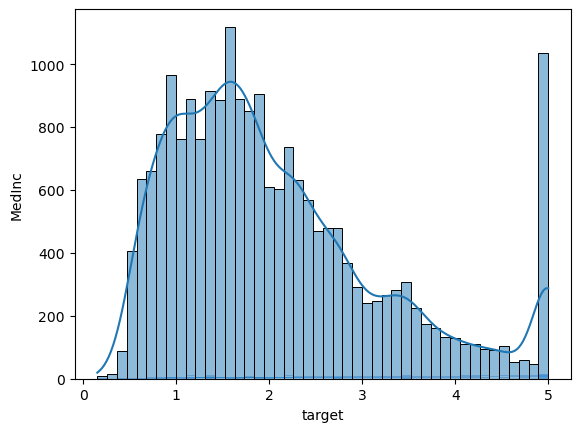

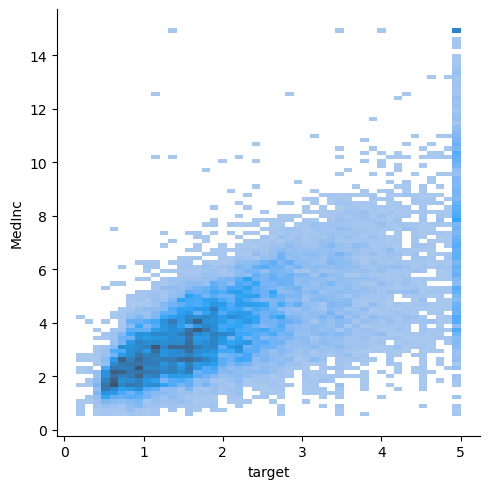

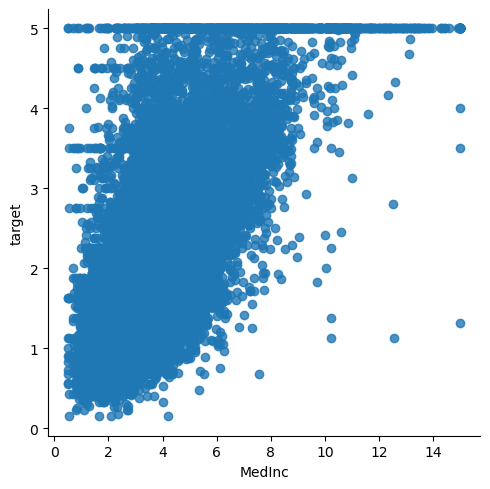

In [51]:

# histogram
sns.histplot(df, x='target', y='MedInc', kde=True, bins='auto')
sns.histplot(df, x='target', kde=True, bins='auto')
plt.show()

# displot
sns.displot(data=df, x='target', y='MedInc')

# scatterplot
sns.lmplot(data=df, fit_reg=False, x='MedInc', y='target')
plt.show()

# Model

In [67]:
# choose variables for the model
X = df.drop(columns=['target']).values # drops target keeping independent variables
y = df[['target']].copy() # keeps dependent variable
y = y['target'].values # becomes an array

# import models to be able to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=41)

# import RandomForest for model
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
print(forest_model.predict([[8.3252, 41.0, 6.984127, 1.023810, 322.0, 2.555556, 37.88, -122.23]])) # a test to see if model is working
y_predict = forest_model.predict(X_test)

[4.4306409]


# Accuracy Analysis

In [69]:
mean_absolute_percentage_error(y_test, y_predict)

0.18001686959409097

In [71]:
mean_squared_error(y_test, y_predict)

0.2449293331789381

In [73]:
r2_score(y_test, y_predict)

0.813778653854444

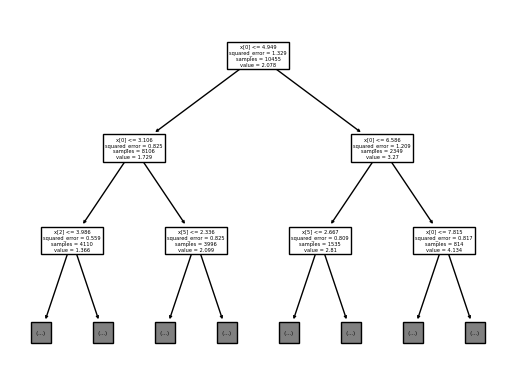

In [62]:
tree.plot_tree(forest_model.estimators_[99], max_depth=2)
plt.show()

# User Interface

In [65]:
# adds values for user to input their values
MedInc_widget = widgets.FloatText(description='MedInc:', value=0)
HouseAge_widget = widgets.FloatText(description='House Age:', value=0)
AveRooms_widget = widgets.FloatText(description='Average Rooms:', value=0)
AveBedrms_widget = widgets.FloatText(description='AveBedrms:', value=0)
Population_widget = widgets.FloatText(description='Population:', value=0)
AveOccup_widget = widgets.FloatText(description='AveOccup:', value=0)
Latitude_widget = widgets.FloatText(description='Latitude:', value=0)
Longitude_widget = widgets.FloatText(description='Longitude:', value=0)

# button for user to predict housing prices (expressed in $100,000)
button_predict = widgets.Button(description='Predict')
button_output = widgets.Label(value='Use this button to predict housing prices')

#button functionality to predict
def predictButton(b):
    prediction = forest_model.predict([[MedInc_widget.value, HouseAge_widget.value, AveRooms_widget.value, AveBedrms_widget.value, 
                                     Population_widget.value, AveOccup_widget.value, Latitude_widget.value, Longitude_widget.value]])
    button_output.value='Prediction='+str(prediction)

button_predict.on_click(predictButton)

# displays the text boxes and buttons in a VBox
vb=widgets.VBox([MedInc_widget, HouseAge_widget, AveRooms_widget, AveBedrms_widget, Population_widget, AveOccup_widget, Latitude_widget
                 ,Longitude_widget, button_predict, button_output])
print('Enter the values based in $100,000. ex. 2.5 is $250,000')
display(vb)

Enter the values based in $100,000. ex. 2.5 is $250,000
